In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 
url='https://raw.githubusercontent.com/BekBrace/Machine.Learning.Rainfall.Prediction/master/austin_weather.csv'
data=pd.read_csv(url)
print(data.shape)

(1319, 21)


# cleaning data

In [2]:
data=data.drop(['Date','Events','SeaLevelPressureHighInches','SeaLevelPressureLowInches'], axis=1)
data=data.replace('T',0.0)
data=data.replace('-',0.0)
data.to_csv('austin_final.csv') #updated my csv after removing some col and replacing some values


In [3]:
#call new data
data=pd.read_csv('austin_final.csv')
X=data.drop(['PrecipitationSumInches'],axis=1)
Y=data['PrecipitationSumInches']
Y=Y.values.reshape(-1,1) #rehsape into 3d vector
day_index=798
days=[i for i in range(Y.size)]
clf=LinearRegression()
clf.fit(X,Y)

LinearRegression()

In [4]:

inp = np.array([[74], [60], [45], [67], [49], [43], [33], [45],
                [57], [29.68], [10], [7], [2], [0], [20], [4], [31]])

inp = inp.reshape(1,-1)

# Print output
print('The precipitation in inches for the input is:', clf.predict(inp))

The precipitation in inches for the input is: [[1.33868402]]


precipation graph


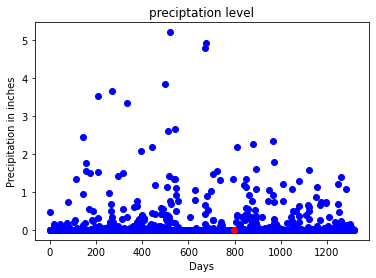

In [7]:
#plot a graph
print('precipation graph')
plt.scatter(days,Y,color='blue')
plt.scatter(days[day_index],Y[day_index],color='red')
plt.title('preciptation level')
plt.xlabel('Days')
plt.ylabel('Precipitation in inches')
plt.show()

preciptation vs Selected Attributes graph:


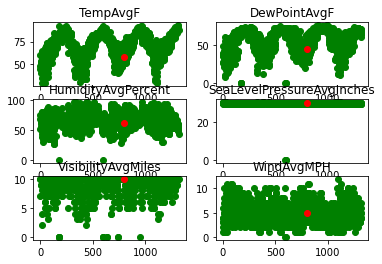

In [6]:
x_f = X.filter(['TempAvgF', 'DewPointAvgF', 'HumidityAvgPercent',
                'SeaLevelPressureAvgInches', 'VisibilityAvgMiles',
                'WindAvgMPH'], axis=1)
print('preciptation vs Selected Attributes graph:')
for i in range(x_f.columns.size):
    plt.subplot(3,2,i+1)
    plt.scatter(days, x_f[x_f.columns.values[i][:100]], color='g')
    plt.scatter(days[day_index], x_f[x_f.columns.values[i]]
                [day_index], color='r')
    plt.title(x_f.columns.values[i])

# plot a graph with a few features vs precipitation to observe the trends
plt.show()